In [1]:
import os
import cv2
import random
from pycocotools.coco import COCO
import numpy as np
import torch
import skimage.io as io

import matplotlib.pyplot as plt
import torchvision.transforms.functional as tf
from matplotlib.pyplot import figure

from utils import transform_annotations
from dataloader import COCODataset

In [2]:
# https://colab.research.google.com/github/sachinruk/blog/blob/master/_notebooks/2021-08-21-coco-semantic-segmentation-data.ipynb#scrollTo=SLLyKq9pTxqc

In [3]:
DATA_PATH = "/home/glebk/Datasets/dataset_ocr" 

In [4]:
MODES = ["train", "test"]

for mode in MODES:
    annot_file = os.path.join(DATA_PATH, mode + ".json")
    coco=COCO(annot_file)
    transform_annotations(DATA_PATH, coco, mode)

loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
loading annotations into memory...
Done (t=0.01s)
creating index...
index created!


In [5]:
annot_file = os.path.join(DATA_PATH, "train_tf" + ".json")
coco = COCO(annot_file)
dataset = COCODataset(coco, DATA_PATH, None)



loading annotations into memory...
Done (t=0.07s)
creating index...
index created!


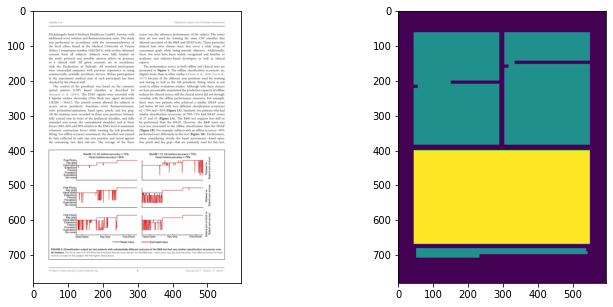

In [38]:
idx = np.random.randint(len(dataset))
img, mask = dataset[idx]

plt.figure(figsize=(12, 5))
plt.subplot(121)
plt.imshow(tf.to_pil_image(img))
plt.subplot(122)
plt.imshow(mask.squeeze())
plt.show()